# Predict Loan Eligibility for Dream Housing Finance company


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv(r'train_projU.csv')
test = pd.read_csv(r'test_projU.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# STEP 1: Data Pre- Processing

# a) Finding the Missing Value Features

In [4]:
# Join both the train and test dataset
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)

Train dataset shape: (614, 14)
Test dataset shape: (367, 14)
Concatenated dataset shape: (981, 14)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [6]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [7]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['LoanAmount'].unique())
print(dataset['Loan_Amount_Term'].unique())
print(dataset['Credit_History'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

# b) replacing missing data with substituted values
<b>Out of the features with missing NaN values, the missing values in 'Loan_Status' are the Values that need to be predicted by our model. Hence, we need not impute the NaN values in Loan_Status column.
    
1) Missing values in Integer and Float dtype columns are replaced by their median
    
2) Missing values in Object dtype columns are replaced by their mode</b>

In [8]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

<ipython-input-8-c8d1e34fa11b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
<ipython-input-8-c8d1e34fa11b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [9]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [11]:
print(len(dataset['Gender'].unique()))
print(len(dataset['Married'].unique()))
print(len(dataset['Dependents'].unique()))
print(len(dataset['Self_Employed'].unique()))
print(len(dataset['LoanAmount'].unique()))
print(len(dataset['Loan_Amount_Term'].unique()))
print(len(dataset['Credit_History'].unique()))
print(len(dataset['Loan_ID'].unique()))
print(len(dataset['Education'].unique()))
print(len(dataset['ApplicantIncome'].unique()))
print(len(dataset['CoapplicantIncome'].unique()))
print(len(dataset['Property_Area'].unique()))
print(len(dataset['source'].unique()))

2
2
4
2
232
12
2
981
2
752
437
3
2


# Spliting the train and test set again after replacing all missing values

In [12]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

<ipython-input-12-a58a8626e24b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
<ipython-input-12-a58a8626e24b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Step 2: Data Visualization


<b> Visualizing Loan_Status </b>

<Axes: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan_Status', ylabel='Loan Status Count'>

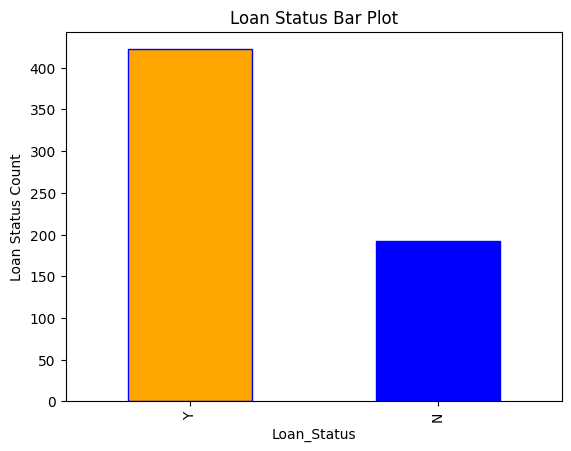

In [67]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['Orange', 'blue'],edgecolor='blue')

<b> Study of categorical features like Gender, Married, Self_Employed and Credit_History </b>

<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

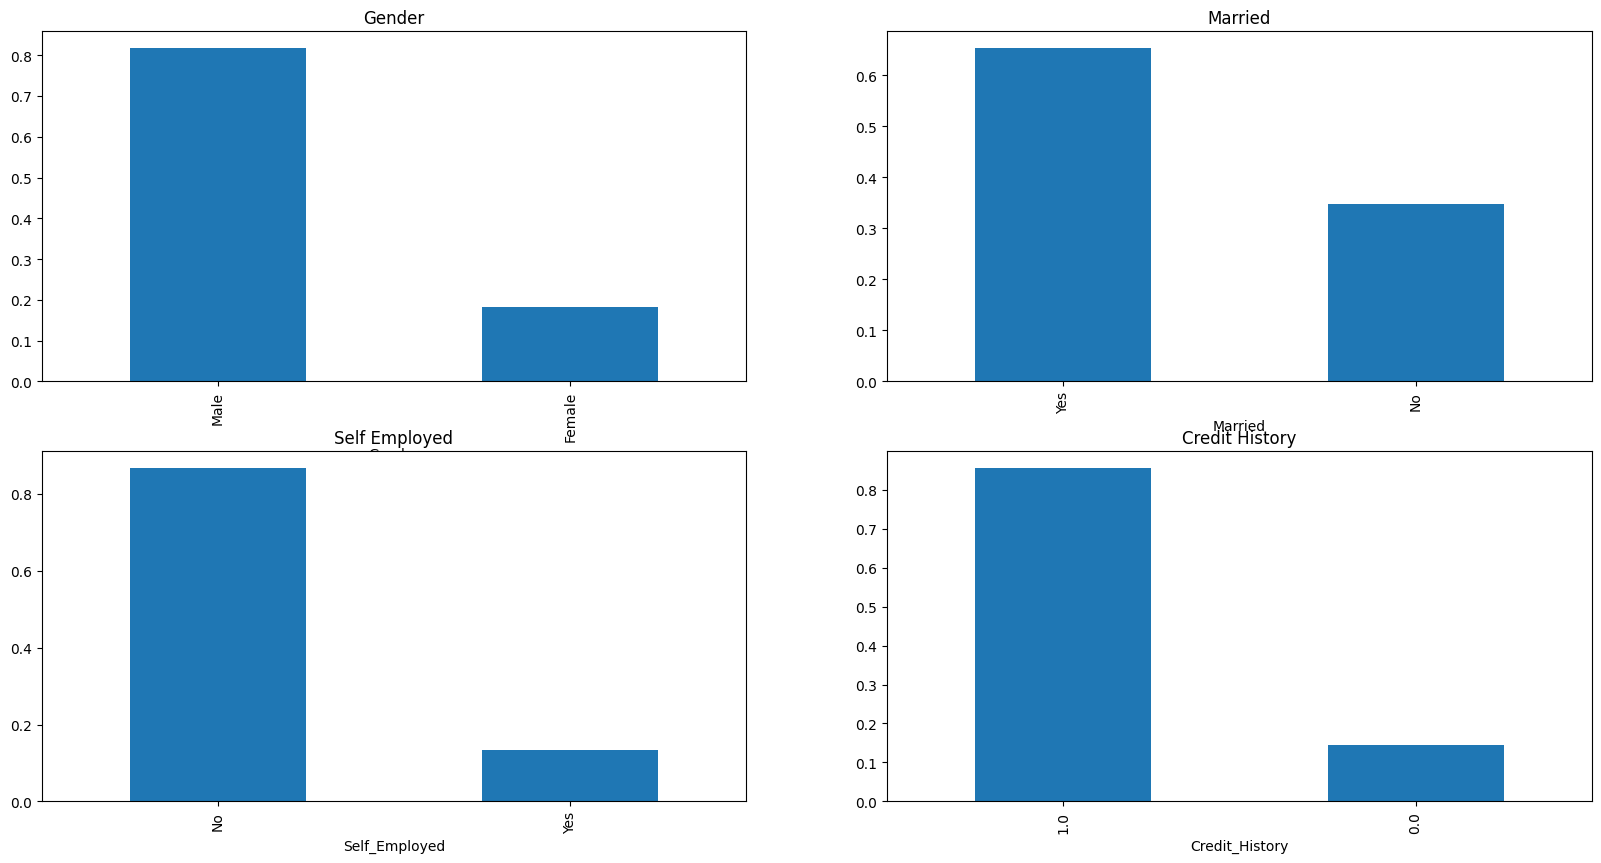

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<b> Categorical Independent Variable vs Target Variable </b>

<Axes: xlabel='Property_Area'>

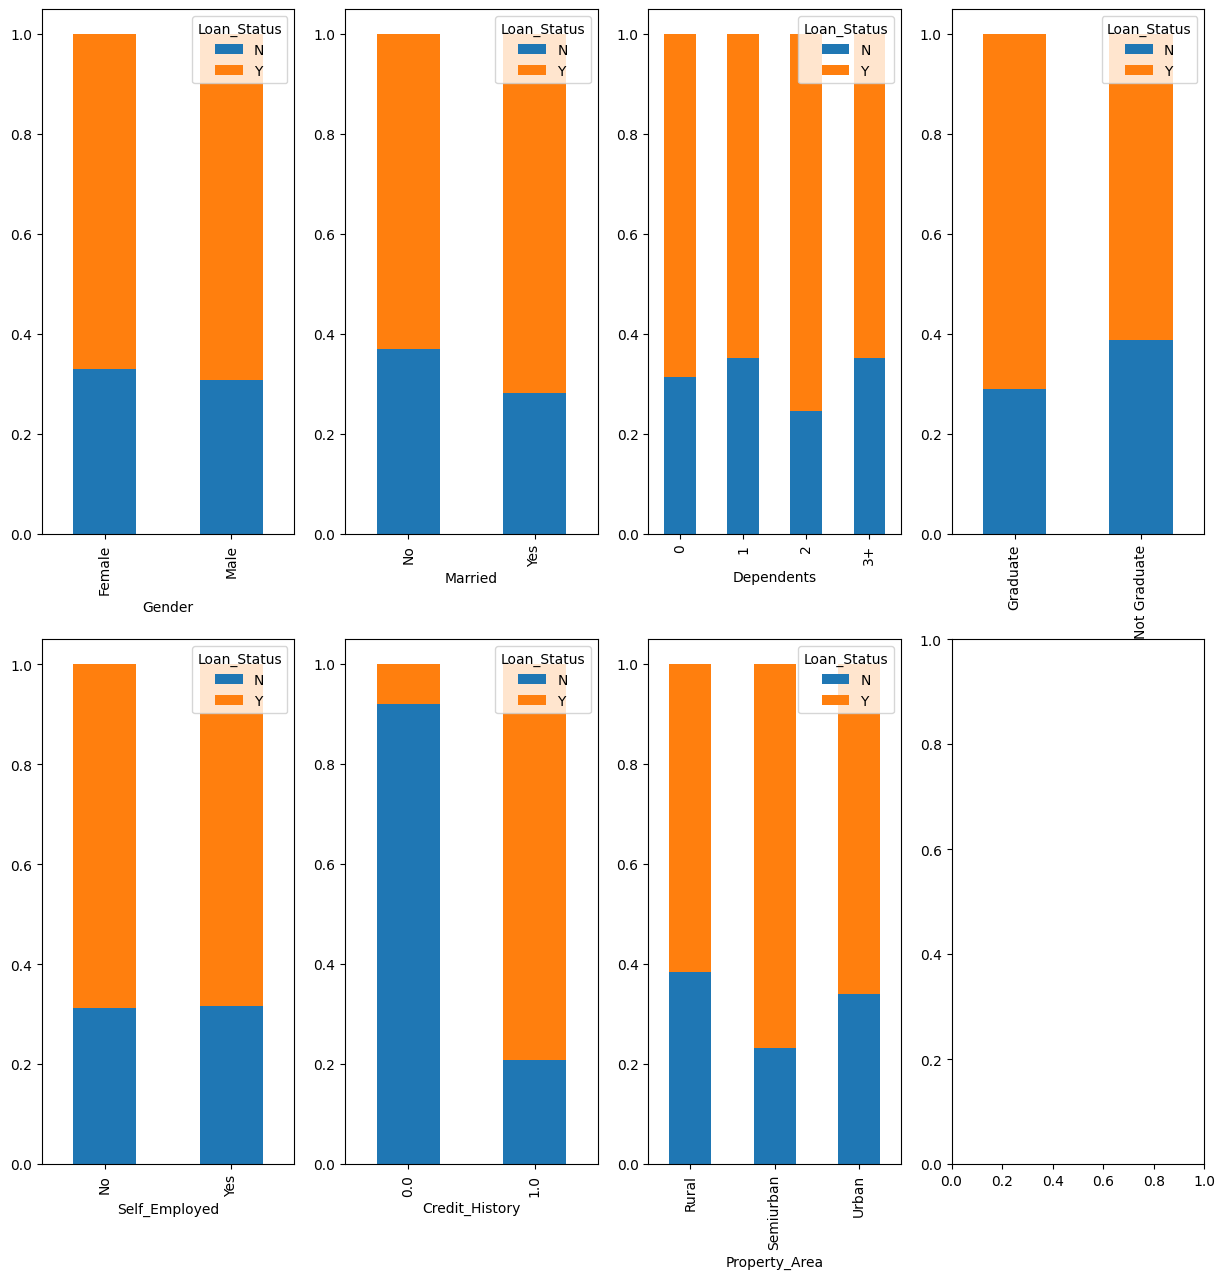

In [16]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

# STEP 3 : Converting the categorical data into numerical data appropriately
<b> scikit-learn only accepts numerical variables. Hence, we need to convert all categorical variables into numeric types.


I am not using LabelEncoder() because this method proved to give very less Accuracy when compared to get_dummies() method</b>

In [17]:
#cols=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
#for label in cols:
#    dataset[label]=LabelEncoder().fit_transform(dataset[label])
#dataset.head()

In [18]:
X=train.drop(["Loan_Status",'Loan_ID'],axis=1)
y=train["Loan_Status"]

X = pd.get_dummies(X,drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True


# Train/Test Split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Step 4: Fitting the dataset to various models
# 1) Logistic Regression

In [20]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [21]:
y_pred = logistic_Regression.predict(x_test)

In [22]:
log = accuracy_score(y_pred,y_test)*100

In [23]:
print(confusion_matrix(y_pred,y_test))

[[ 22   2]
 [ 29 132]]


In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           N       0.43      0.92      0.59        24
           Y       0.99      0.82      0.89       161

    accuracy                           0.83       185
   macro avg       0.71      0.87      0.74       185
weighted avg       0.91      0.83      0.85       185



# 2) KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=200)

In [26]:
pred_knn = knn.predict(x_test)

In [27]:
KNN = accuracy_score(pred_knn,y_test)*100

In [28]:
print(confusion_matrix(pred_knn,y_test))

[[  0   0]
 [ 51 134]]


In [29]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
error=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
print(error)

[0.43243243243243246, 0.4864864864864865, 0.40540540540540543, 0.42162162162162165, 0.372972972972973, 0.3891891891891892, 0.3675675675675676, 0.372972972972973, 0.31891891891891894, 0.35135135135135137, 0.3081081081081081, 0.34594594594594597, 0.32432432432432434, 0.33513513513513515, 0.32432432432432434, 0.31351351351351353, 0.2972972972972973, 0.32972972972972975, 0.3027027027027027, 0.31351351351351353, 0.2972972972972973, 0.31351351351351353, 0.2972972972972973, 0.2972972972972973, 0.2864864864864865, 0.2918918918918919, 0.2810810810810811, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2810810810810811, 0.2864864864864865, 0.2918918918918919, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2756756756756757, 0.2810810810810811, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757]


Text(0, 0.5, 'error rate')

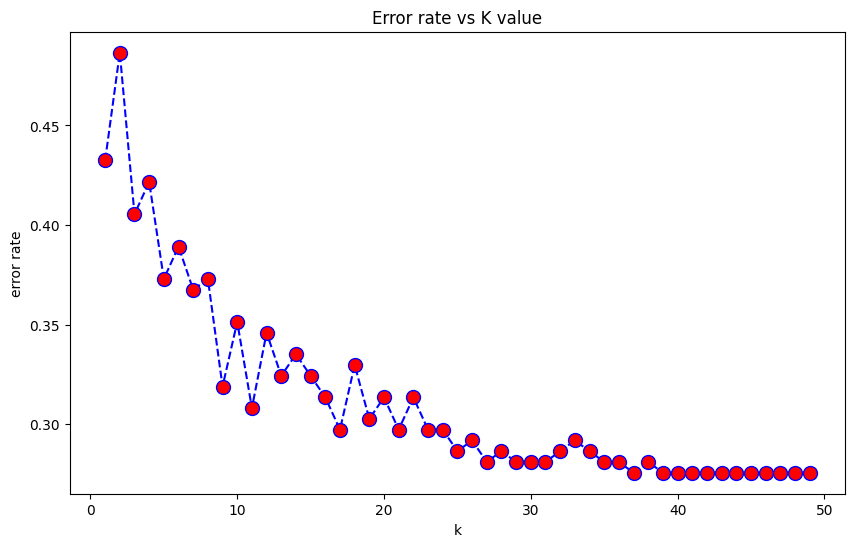

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

# 3) Decision Tree - Entropy

In [32]:
dtree_en = DecisionTreeClassifier(criterion='entropy',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=3)

In [33]:
clf = dtree_en.fit(x_train,y_train)

In [34]:
pred_dt = clf.predict(x_test)

In [35]:
DTREE = accuracy_score(pred_dt,y_test)*100

In [36]:
cm=confusion_matrix(y_test,pred_dt)
print(cm)
print(classification_report(y_test,pred_dt))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# 4) Decision Tree - Gini

In [37]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       splitter='random')

In [38]:
pred_g = dtree.predict(x_test)

In [39]:
DTREE_G = accuracy_score(y_test,pred_g)*100

In [40]:
cm=confusion_matrix(y_test,pred_g)
print(cm)
print(classification_report(y_test,pred_g))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# 5) Random Forest

In [41]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=400)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [42]:
pred_rf= rfc.predict(x_test)

In [43]:
RFC = accuracy_score(y_test,pred_rf)*100
RFC

80.0

In [44]:
print(confusion_matrix(pred_rf,y_test))

[[ 22   8]
 [ 29 126]]


In [45]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           N       0.43      0.73      0.54        30
           Y       0.94      0.81      0.87       155

    accuracy                           0.80       185
   macro avg       0.69      0.77      0.71       185
weighted avg       0.86      0.80      0.82       185



# 6) AdaBoost (Entropy-Decision Tree)

In [48]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                    random_state=0),
                   n_estimators=80, random_state=0)

In [49]:
pred = adaboost.predict(x_test)

In [50]:
ada = accuracy_score(y_test,pred)*100

# 7) AdaBoost (Gini-Decision Tree)

In [52]:
model_g = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=0)
adaboost1 = AdaBoostClassifier(n_estimators=90, estimator=model_g,random_state=0)
adaboost1.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=0),
                   n_estimators=90, random_state=0)

In [53]:
pred_gini = adaboost.predict(x_test)

In [54]:
g = accuracy_score(y_test,pred_gini)*100

In [65]:
print("1)  Logistic Regression    :",log)
print("2)  KNN                    :",KNN)
print("3)  Decision Tree - Entropy:",DTREE)
print("4)  Decision Tree - Gini   :",DTREE_G)
print("5)  Random Forest          :",RFC)
print("6)  AdaBoost - Entropy     :",ada)
print(")  AdaBoost - Gini        :",g)



1)  Logistic Regression    : 83.24324324324324
2)  KNN                    : 72.43243243243244
3)  Decision Tree - Entropy: 82.70270270270271
4)  Decision Tree - Gini   : 82.70270270270271
5)  Random Forest          : 80.0
6)  AdaBoost - Entropy     : 82.16216216216216
)  AdaBoost - Gini        : 82.16216216216216


# Step 5: Deciding Best Fit Model

<b>
    
    1)  Logistic Regression    : 83.24324324324324
    2)  KNN                    : 72.43243243243244
    3)  Decision Tree - Entropy: 82.70270270270271
    4)  Decision Tree - Gini   : 82.70270270270271
    5)  Random Forest          : 80.0
    6)  AdaBoost - Entropy     : 82.16216216216216
    7)  AdaBoost - Gini        : 82.16216216216216
    
    
The best fit model for the given dataset is: <b>LOGISTIC REGRESSION</b>

# STEP 6: Predicting the values of Loan_Status for the data given in    Load_test.csv

In [56]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,NaN
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


# Applying the Logistic Regression Model to the test dataset

In [57]:
Xt = test.drop(["Loan_Status","Loan_ID"],axis=1)
Xt = pd.get_dummies(Xt,drop_first=True)

Xt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
614,5720,0.0,110.0,360.0,1.0,True,True,False,False,False,False,False,False,True
615,3076,1500.0,126.0,360.0,1.0,True,True,True,False,False,False,False,False,True
616,5000,1800.0,208.0,360.0,1.0,True,True,False,True,False,False,False,False,True
617,2340,2546.0,100.0,360.0,1.0,True,True,False,True,False,False,False,False,True
618,3276,0.0,78.0,360.0,1.0,True,False,False,False,False,True,False,False,True


In [58]:
test_pred = logistic_Regression.predict(Xt)

In [59]:
test["Loan_Status"] = test_pred

<ipython-input-59-5461241fe85f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Loan_Status"] = test_pred


In [60]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [61]:
submission = test[["Loan_ID","Loan_Status"]].copy()

In [62]:
submission.to_csv('testLR.csv')